In [1]:
from deepface import DeepFace
import deepface
from deepface.detectors import FaceDetector, OpenCvWrapper, SsdWrapper, DlibWrapper, MtcnnWrapper, RetinaFaceWrapper, MediapipeWrapper
import cv2
import time
from matplotlib import pyplot as plt

In [4]:
def print_image(img, title='result', covert_colors=True):
    copy_img = img.copy()
    if covert_colors:
        copy_img = cv2.cvtColor(copy_img, cv2.COLOR_BGRA2RGBA)
    plt.imshow(copy_img[:, :])
    plt.title(title)
    plt.show()


def draw_face_rectangle(img, rectangle):
    x = rectangle[0]
    y = rectangle[1]
    w = rectangle[2]
    h = rectangle[3]
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return img


def print_facec_with_rects(img, rects):
    cimg = img.copy()
    for rect in rects:
        draw_face_rectangle(cimg, rect)
    print_image(cimg)

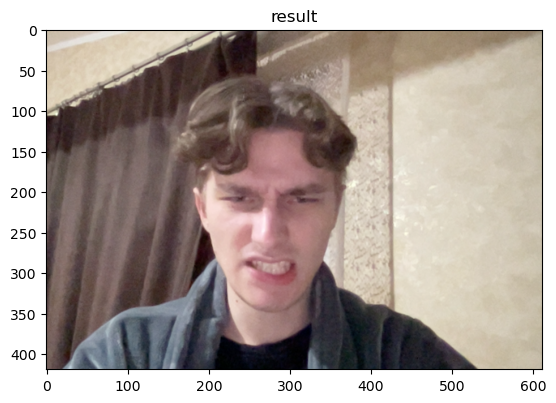

In [12]:
# img = cv2.imread('../imgs/recognition-test-2.jpg')
img = cv2.imread('../imgs/img_2.png')
print_image(img)

In [34]:
def runWithTime(fun):
    startTime = time.time()
    fun()
    resultTimeMs = (time.time() - startTime) * 1000
    print(f'Execution time: {resultTimeMs} ms')

In [13]:
DeepFace.analyze(img, detector_backend='mediapipe')

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]  


{'emotion': {'angry': 73.16755972295287,
  'disgust': 1.199756140290959,
  'fear': 18.24274292674745,
  'happy': 0.5358653435569593,
  'sad': 6.269817051909321,
  'surprise': 7.551346593781908e-05,
  'neutral': 0.5841749489545883},
 'dominant_emotion': 'angry',
 'region': {'x': 176, 'y': 153, 'w': 189, 'h': 189},
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 1.7814246136799226,
  'indian': 5.243155300209242,
  'black': 0.2916943688582998,
  'white': 35.72179888020747,
  'middle eastern': 34.632154383191725,
  'latino hispanic': 22.329771359549245},
 'dominant_race': 'white'}

In [37]:
model_names = ["VGG-Face", "Facenet", "OpenFace", "DeepFace"]
pairs = [
    ('../imgs/img_1.png', '../imgs/recognition-test-1.jpeg'),
    ('../imgs/img_2.png', '../imgs/recognition-test-1.jpeg'),
    ('../imgs/img_3.png', '../imgs/recognition-test-1.jpeg'),
    ('../imgs/img_5.jpg', '../imgs/recognition-test-1.jpeg'),
]
pairs2 = [
    ['../imgs/img_1.png', '../imgs/recognition-test-1.jpeg'],
    ['../imgs/img_2.png', '../imgs/recognition-test-1.jpeg'],
    ['../imgs/img_3.png', '../imgs/recognition-test-1.jpeg'],
    ['../imgs/img_5.jpg', '../imgs/recognition-test-1.jpeg'],
]

def var1():
    for img1, img2 in pairs:
        try:
            res = DeepFace.verify(img1, img2, model_name='VGG-Face', detector_backend='mediapipe', prog_bar= False)
            print(res)
        except:
            print('Can\'t recognize')

def var2():
    res = DeepFace.verify(pairs2, model_name='VGG-Face', detector_backend='mediapipe', prog_bar= False, enforce_detection=False)
    print(res)

runWithTime(var1)
runWithTime(var2)

{'verified': True, 'distance': 0.2958073252114729, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mediapipe', 'similarity_metric': 'cosine'}
{'verified': False, 'distance': 0.46670700125880094, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mediapipe', 'similarity_metric': 'cosine'}
{'verified': True, 'distance': 0.2896835759350662, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mediapipe', 'similarity_metric': 'cosine'}
Can't recognize
Execution time: 3022.247791290283 ms
{'pair_1': {'verified': True, 'distance': 0.2958073252114729, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mediapipe', 'similarity_metric': 'cosine'}, 'pair_2': {'verified': False, 'distance': 0.46670700125880094, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mediapipe', 'similarity_metric': 'cosine'}, 'pair_3': {'verified': True, 'distance': 0.2896835759350662, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mediapipe', 'similarity_metri

In [43]:
img3 = cv2.imread('../imgs/img_3.png')

DeepFace.verify(img3, '../imgs/recognition-test-1.jpeg', model_name='VGG-Face', detector_backend='mediapipe', prog_bar= False)

{'verified': True,
 'distance': 0.2896835759350662,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'mediapipe',
 'similarity_metric': 'cosine'}

In [39]:
res

{'verified': True,
 'distance': 0.2958073252114729,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'mediapipe',
 'similarity_metric': 'cosine'}

In [40]:
res['verified']

True